### detecting edges:




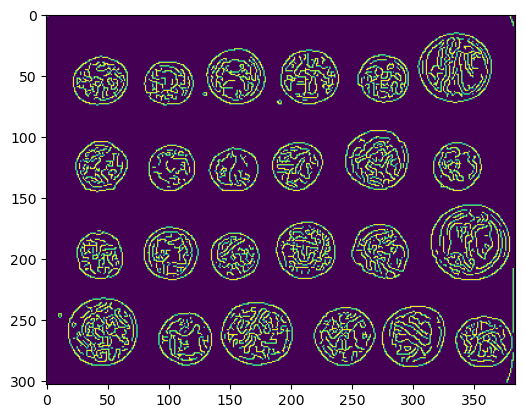

In [8]:
from skimage.feature import canny
from skimage import data , color
from skimage.color import rgb2gray
import matplotlib.pyplot as plt

coins = data.coins()
#convert image to grayscale


canny_edges= canny(coins)
plt.imshow(canny_edges)


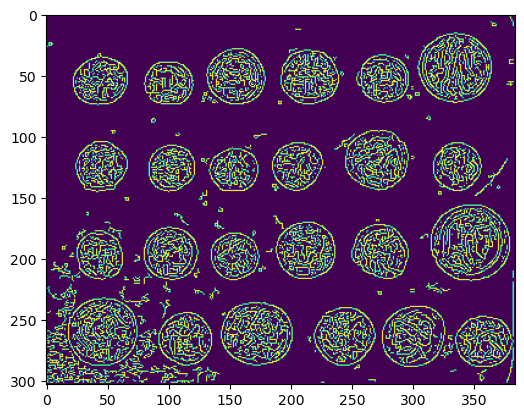

In [10]:
#apply canny detector with a sigma of 0.5
canny_edges_0_5 = canny(coins , sigma=0.5)

#show resulting images with edges 

plt.imshow(canny_edges_0_5)



### harris corner detector


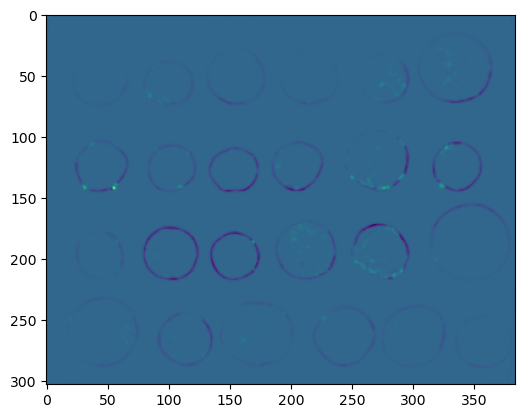

In [12]:
### right around the corner
# Apply the detector  to measure the possible corners
from skimage.feature import corner_harris
#for grays
measure_image = corner_harris(coins)

plt.imshow(measure_image)


A total of 477 corners were detected


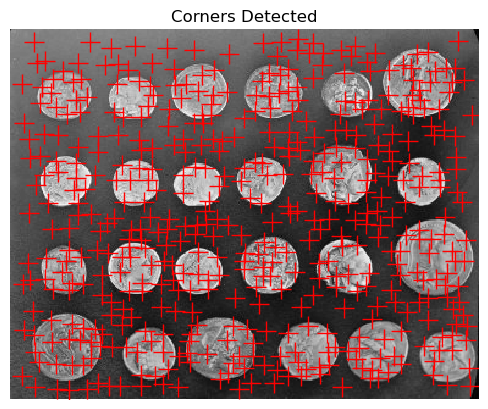

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.feature import corner_harris, corner_peaks
from skimage import data, color

# Find the peaks of the corners using the Harris detector
# Load the 'coins' image from scikit-image's sample data
image = data.coins()

# If the image is not grayscale, convert it to grayscale
if len(image.shape) == 3:  # Check if the image is RGB (3 channels)
    image = color.rgb2gray(image)

# Detect corners using Harris corner detection
coords = corner_peaks(corner_harris(image), min_distance=5)

# Print the number of detected corners
print('A total of', len(coords), 'corners were detected')

# Function to display the image with detected corners
def show_image_with_detected_corners(image, coords, title='Corners Detected'):
    plt.imshow(image, interpolation='nearest', cmap='gray')
    plt.title(title)
    plt.plot(coords[:, 1], coords[:, 0], '+r', markersize=15)  # Plot the corners
    plt.axis('off')  # Hide the axes
    plt.show()

# Display the image with the detected corners
show_image_with_detected_corners(image, coords)


### face detection

filters/
auto focus/
recommendations/
blur for privacy protection/
to recognize emotions later on /

[{'r': 429, 'c': 413, 'width': 38, 'height': 38}, {'r': 71, 'c': 177, 'width': 85, 'height': 85}]


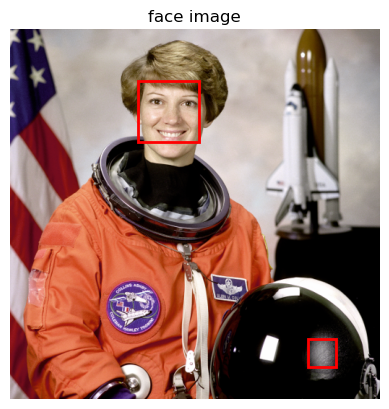

In [11]:
from skimage.feature import Cascade
import matplotlib.pyplot as plt
import matplotlib.patches as patches  # Import patches for drawing rectangles
from skimage.feature import Cascade
from skimage import data

image = data.astronaut()

#load the trained file from the module root
trained_file = data.lbp_frontal_face_cascade_filename()

#initialize the detector cascade 
detector = Cascade(trained_file)

#apply detector on the image

detected = detector.detect_multi_scale(img=image , scale_factor =1.2, step_ratio =1,min_size=(10,10),max_size=(200,200))

print(detected)
def show_detected_face(result , detected , title='face image'):
    plt.imshow(result)
    img_desc=plt.gca()
    plt.set_cmap('gray')
    plt.title(title)
    plt.axis('off')
    for patch in detected:
        img_desc.add_patch(
            patches.Rectangle(
                (patch['c'],patch['r']),
                patch['width'],
                patch['height'],
                fill=False , color='r',linewidth=2)
        )
    plt.show()
        
show_detected_face(image , detected)

### real_world applications
## privacy protection




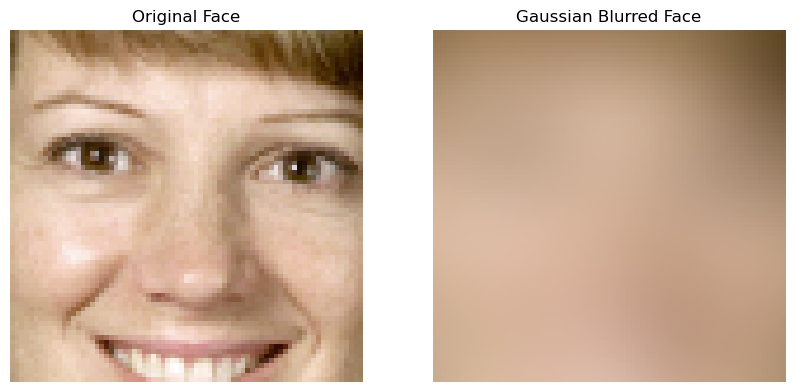

In [14]:
from skimage.feature import Cascade
from skimage.filters import gaussian

#detect the faces

detected = detector.detect_multi_scale(img = image, scale_factor=1.2 , step_ratio=1, min_size=(50,50), max_size=(100,100))

def getFace(d):
    x , y = d['r'],d['c']
    width, height = d['width'], d['height']
    # Return the cropped face
    return image[x:x+height, y:y+width]

#for each detected face 
for d in detected :
    #obtain the face cropped from detected coordinates
    face = getFace(d)
    
    #apply gaussian filter to extracted face
    gaussian_face = gaussian(face , channel_axis = -1 , sigma = 10)
    
    fig, ax = plt.subplots(1, 2, figsize=(10, 5))
    ax[0].imshow(face)
    ax[0].set_title("Original Face")
    ax[0].axis("off")
    
    ax[1].imshow(gaussian_face)
    ax[1].set_title("Gaussian Blurred Face")
    ax[1].axis("off")
    
    plt.show()
    
    